# Problem Definition

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

Used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

## Objective
To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.

## Data Set
The data includes the following features:

Data Dictionary

- S.No.: Serial number
- Name: Name of the car which includes brand name and model name
- Location: Location in which the car is being sold or is available for purchase (cities)
- Year: Manufacturing year of the car
- Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in km
- Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car (Automatic/Manual)
- Owner: Type of ownership
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC
- Power: The maximum power of the engine in bhp
- Seats: The number of seats in the car
- New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)
- Price: The price of the used car in INR Lakhs

### Questions
- How do each of the independent variables (Location, Year, Kilometers_driven, ...) affect the dependent variable Price?
- How much do each of the above affect the price?
- How does the price vary with Location?
- What is the distribution of mileage?
- How does mileage vary with fuel type, engine, and power?
- How much does the owner type affect the price?

In [705]:
import pandas as pd
import numpy as np
np.random.seed(5)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler

In [706]:
data = pd.read_csv('./data/used_cars_data.csv')

### Statistical Summary

In [707]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB
None


There are 5 numerical variables in the initial data, 4 if not including the dependent variable.

In [708]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,7253.0,3626.000000,2093.905084,0.00,1813.0,3626.00,5439.00,7252.0
Year,7253.0,2013.365366,3.254421,1996.00,2011.0,2014.00,2016.00,2019.0
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.0,53416.00,73000.00,6500000.0
Seats,7200.0,5.279722,0.811660,0.00,5.0,5.00,5.00,10.0
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0


The minimum kilometers driven is only 171, while the maximum is over 6 million? (That one seems like unclean data).
Serial number should not be treated as a numerical variable.
The oldest car is from 1996, the newest from 2019. Most of the cars are fairly recent, the data is left-skewed with a median at 2014.
The min number of seats is 0, which looks like more unclean data, while the max is 10.

In [709]:
pd.isnull(data).sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price            6247
Price                1234
dtype: int64

There are lots of nulls, which we will need to take care of.

# Exploratory Data Analysis & Some Preprocessing
Some of the data columns need to be processed to be suitable for visualization for exploratory data analysis. The bulk of preprocessing will come later.

In [710]:
data.head(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [711]:
data.sample(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
1904,1904,Mercedes-Benz New C-Class 250 CDI Classic,Hyderabad,2012,41367,Diesel,Automatic,First,15.8 kmpl,2148 CC,170 bhp,5.0,NaN,18.49
7160,7160,Mini Cooper Countryman D,Hyderabad,2013,50000,Diesel,Automatic,First,23.8 kmpl,1998 CC,112 bhp,5.0,NaN,NaN
3854,3854,Hyundai Sonata GOLD,Chennai,2003,44200,Petrol,Manual,Second,11.7 kmpl,1997 CC,134 bhp,5.0,NaN,1.50
489,489,Mercedes-Benz GLS 350d 4MATIC,Pune,2017,129000,Diesel,Automatic,First,11.0 kmpl,2987 CC,258 bhp,7.0,1 Cr,56.00
3819,3819,Renault Fluence 2.0,Jaipur,2011,63000,Petrol,Automatic,First,13.4 kmpl,1997 CC,135.1 bhp,5.0,NaN,4.75


## Univariate Analysis

In [712]:
def plot_categorical(column):
    counts = column.value_counts()
    plot = sns.barplot(x=counts.index, y=counts)
    plot.axes.xaxis.set_tick_params(labelrotation=90)

processed_data = data.copy()

#### Name

Mahindra XUV500 W8 2WD                       55
Maruti Swift VDI                             49
Maruti Swift Dzire VDI                       42
Honda City 1.5 S MT                          39
Maruti Swift VDI BSIV                        37
                                             ..
Hyundai Grand i10 1.2 CRDi Asta               1
Hyundai EON 1.0 Kappa Magna Plus Optional     1
Ford Figo 2015-2019 1.5P Titanium AT          1
Hyundai i20 1.2 Asta with AVN                 1
Volkswagen Passat Highline DSG                1
Name: Name, Length: 2041, dtype: int64


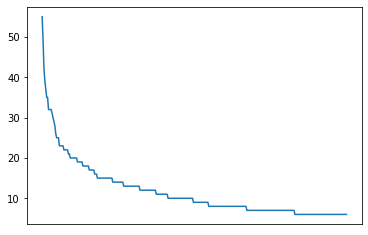

In [713]:
# plot of name column takes too long, so just get value_count
counts = data['Name'].value_counts()
print(counts)
fig = plt.figure()
ax = fig.add_subplot()
ax.get_xaxis().set_visible(False) # this is necessary otherwise python breaks trying to add the long text labels
plt.plot(counts[counts > 5]) # threshold of 5 to make the plot fast, plot looks identical

The most popular cars are bought by far the most, with the large majority getting bought very little.

#### Location

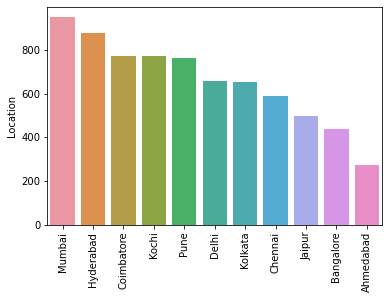

In [714]:
plot_categorical(data['Location'])

A fairly linear spread of cars sold across location. Mumbai has about 4 times as many used cars sold compared to Ahmedabad. Mumbai is a very major city, so that makes sense.

#### Year

<AxesSubplot:ylabel='Year'>

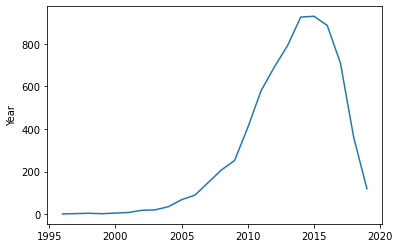

In [715]:
# convert year column to numerical
processed_data['Year'] = data['Year'].astype(int)
counts = processed_data['Year'].value_counts()
sns.lineplot(x=counts.index, y=counts)

The most used cars bought is around 2014-2015, with less bought before then and less bought after. A possible reason is because people don't want "too-old" cars, and people don't want to buy very recent used cars (2016-2020) because they might as well buy a brand new car for not that much more in that case.

#### Kilometers Driven

<AxesSubplot:xlabel='Kilometers_Driven'>

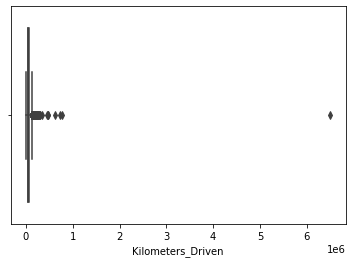

In [716]:
sns.boxplot(x=data['Kilometers_Driven'])

This is not very useful with that massive outlier, so let's try again.

count      7252.000000
mean      57810.852868
std       37499.537277
min         171.000000
25%       34000.000000
50%       53404.000000
75%       73000.000000
max      775000.000000
Name: Kilometers_Driven, dtype: float64

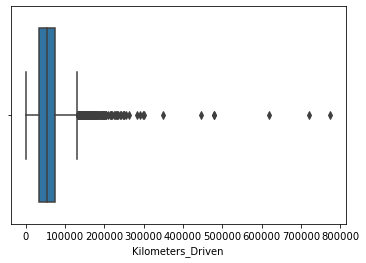

In [717]:
data_without_outlier = data[data['Kilometers_Driven'] < 1000000]
sns.boxplot(x=data_without_outlier['Kilometers_Driven'])
data_without_outlier.describe()['Kilometers_Driven'].T

Without the obvious outlier, the data is right-skewed. The remaining outliers may be useful information, so we will keep them for now.

#### Fuel Type

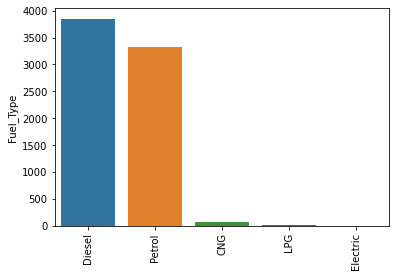

In [718]:
plot_categorical(data['Fuel_Type'])

The majority is Diesel and Petrol.

#### Transmission

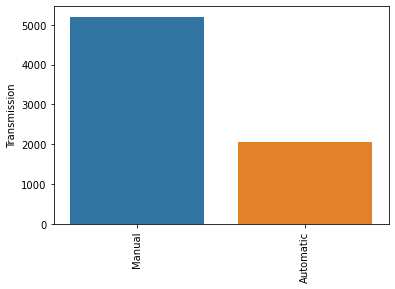

In [719]:
plot_categorical(data['Transmission'])

There are much more Manual used cars than Automatic

#### Owner Type

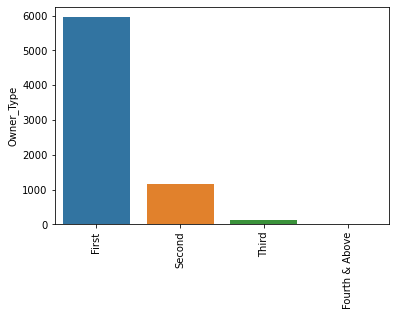

In [720]:
plot_categorical(data['Owner_Type'])

Most of the used cars only had one owner before, much less had 2, 3, and 4 and above.

#### Mileage

In [721]:
def stripUnits(series):
    return series.str.split(expand=True)[0].str.strip().astype("float")

In [722]:
# check if all rows are formatted the same
data['Mileage'].str[-5:].value_counts()

 kmpl    7177
km/kg      74
Name: Mileage, dtype: int64

In [723]:
# the FAQ says to ignore the different units and treat them all as numbers
processed_data['Mileage'] = stripUnits(data['Mileage'])

<AxesSubplot:xlabel='Mileage', ylabel='Count'>

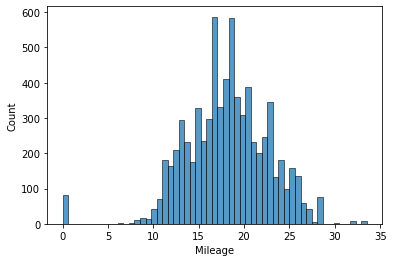

In [724]:
sns.histplot(processed_data['Mileage'])

Mileage looks very normally distributed, with the mean between 15-20.

#### Engine

In [725]:
processed_data['Engine'] = stripUnits(data['Engine'])

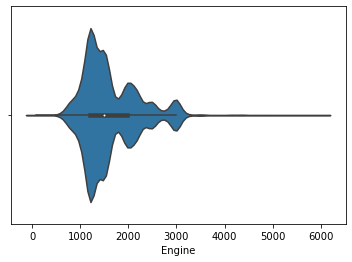

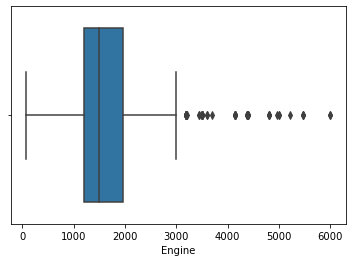

In [726]:
sns.violinplot(x=processed_data['Engine'])
plt.show()
sns.boxplot(x=processed_data['Engine'])

processed_data["Engine"] = np.log(processed_data["Engine"])

The engine data is slightly right-skewed. The median is around 1500.

#### Power

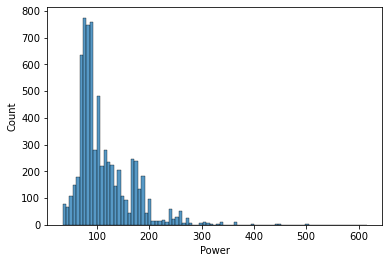

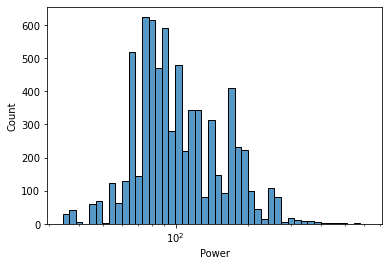

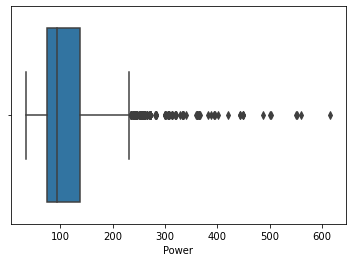

In [727]:
processed_data['Power'] = stripUnits(data['Power'])
sns.histplot(processed_data['Power'])
plt.show()
sns.histplot(processed_data['Power'], log_scale=True)
plt.show()
sns.boxplot(x=processed_data['Power'])

processed_data['Power'] = np.log(processed_data['Power'])

This power data is right-skewed. The center and most popular is just under 100 power.

#### Seats

<AxesSubplot:xlabel='Seats', ylabel='Count'>

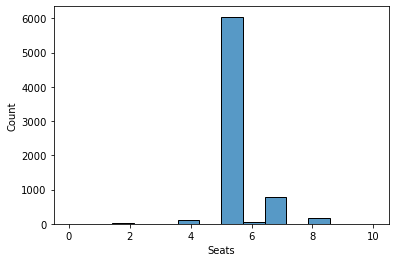

In [728]:
sns.histplot(data['Seats'])

#### New Price

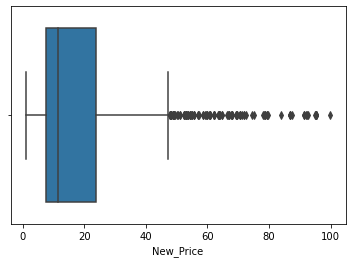

<AxesSubplot:xlabel='New_Price', ylabel='Count'>

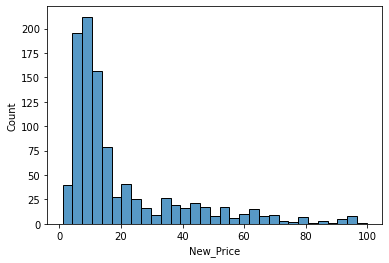

In [729]:
processed_data['New_Price'] = stripUnits(data['New_Price'])
sns.boxplot(x=processed_data['New_Price'])
plt.show()
sns.histplot(x=processed_data['New_Price'])

#### Used Price


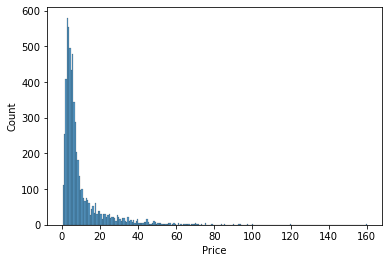

<AxesSubplot:xlabel='Price', ylabel='Count'>

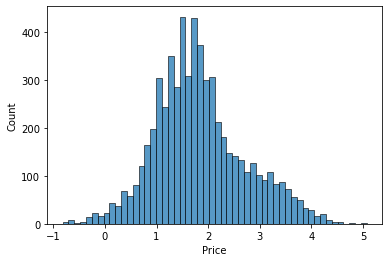

In [730]:
sns.histplot(processed_data["Price"])
plt.show()
sns.histplot(np.log(processed_data['Price']))

In [731]:
processed_data['Price'] = np.log(processed_data['Price']+1)

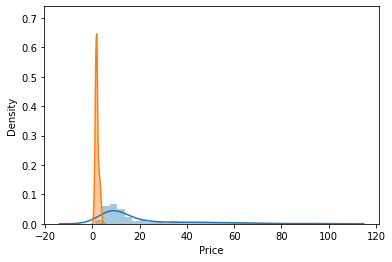

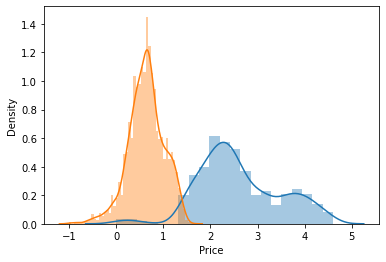

In [732]:
# compare new_price to price

fig, ax = plt.subplots()
sns.distplot(processed_data['New_Price'], ax = ax, label="new price")
sns.distplot(processed_data['Price'], ax=ax, label="used price")
plt.show()
fig, ax = plt.subplots()
sns.distplot(np.log(processed_data['New_Price']), ax = ax, label="new price")
sns.distplot(np.log(processed_data['Price']), ax=ax, label="used price")
plt.show()

For both distributions, they are right-skewed. When applied with a log transformation, they are both roughly normal. Used price distribution is translated slightly cheaper, which makes sense.

### Bivariate Analysis

In [733]:
corr = processed_data.corr()
corr

,S.No.,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,1.000000,0.005573,-0.007697,0.019104,-0.016094,-0.021884,-0.006720,-0.082935,-0.016270
Year,0.005573,1.000000,-0.187859,0.322463,-0.044957,0.039860,0.008216,-0.013467,0.473126
Kilometers_Driven,-0.007697,-0.187859,1.000000,-0.069122,0.098706,0.035881,0.090221,0.015700,-0.043343
Mileage,0.019104,0.322463,-0.069122,1.000000,-0.586539,-0.552110,-0.310632,-0.346379,-0.278392
Engine,-0.016094,-0.044957,0.098706,-0.586539,1.000000,0.880258,0.401272,0.602249,0.702977
Power,-0.021884,0.039860,0.035881,-0.552110,0.880258,1.000000,0.159621,0.734333,0.798430
Seats,-0.006720,0.008216,0.090221,-0.310632,0.401272,0.159621,1.000000,0.001917,0.154954
New_Price,-0.082935,-0.013467,0.015700,-0.346379,0.602249,0.734333,0.001917,1.000000,0.757742
Price,-0.016270,0.473126,-0.043343,-0.278392,0.702977,0.798430,0.154954,0.757742,1.000000


<AxesSubplot:>

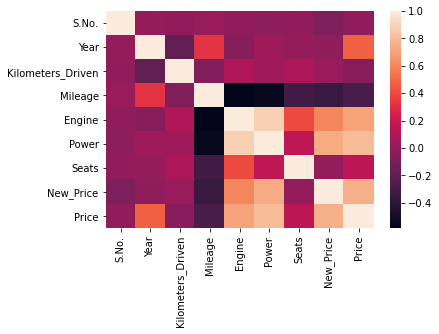

In [734]:
sns.heatmap(corr)

Engine and power are very highly correlated.

<AxesSubplot:xlabel='Engine', ylabel='Power'>

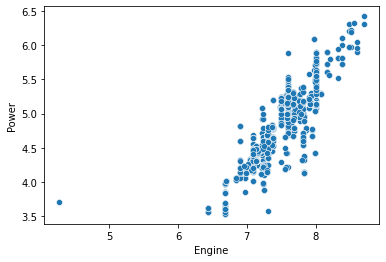

In [735]:
sns.scatterplot(processed_data['Engine'], processed_data['Power'])

The two, engine and power, also seem to be the only features that correlate well with price and new_price. This means they may be good predictors for our model.

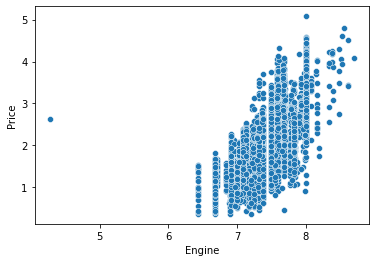

<AxesSubplot:xlabel='Power', ylabel='Price'>

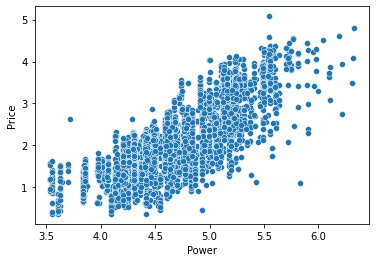

In [736]:
sns.scatterplot(processed_data['Engine'], processed_data['Price'])
plt.show()
sns.scatterplot(processed_data['Power'], processed_data['Price'])

Engine and power are both negatively correlated with mileage.

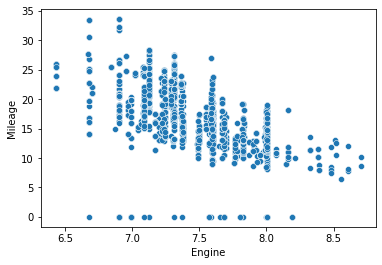

<AxesSubplot:xlabel='Power', ylabel='Mileage'>

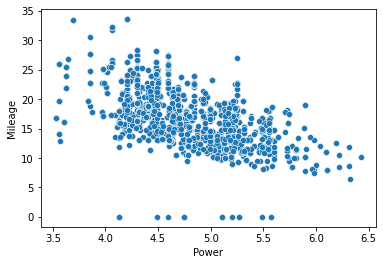

In [737]:
sns.scatterplot(processed_data['Engine'], processed_data['Mileage'])
plt.show()
sns.scatterplot(processed_data['Power'], processed_data['Mileage'])

There seems to be some strange outliers in mileage where they are equal or very close to 0.

<AxesSubplot:xlabel='New_Price', ylabel='Price'>

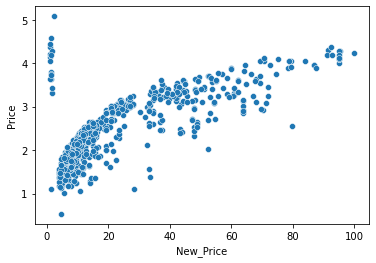

In [738]:
sns.scatterplot(processed_data['New_Price'], processed_data['Price'])

New Price looks like it will be a great predictor of price, except for those very strange outliers on the left which we will have to examine.

<AxesSubplot:xlabel='Seats', ylabel='Price'>

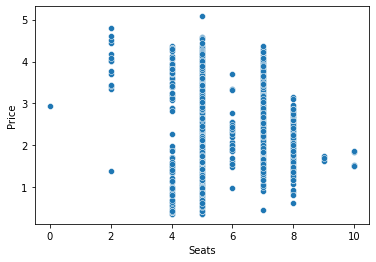

In [739]:
sns.scatterplot(processed_data['Seats'], processed_data['Price'])

Interestingly, Seats has very little correlation to price. May be worthwile to drop it before creating a model.

Also interestingly, kilometers_driven has a very low correlation with price, although the plot doesn't show it. Perhaps it is because of the outlier that we haven't treated yet that skewed the correlation measure. It is worth keeping kilometers_driven as a feature for now as it looks like a useful measure for prediction of price.

<AxesSubplot:xlabel='Kilometers_Driven', ylabel='Price'>

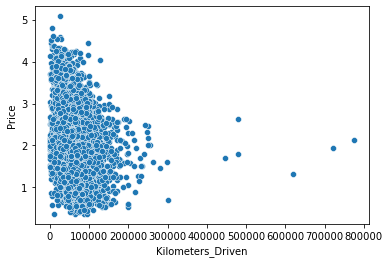

In [740]:
# remove the outlier for now, we will determine how to deal with it in the pre-processing
sns.scatterplot(processed_data[processed_data['Kilometers_Driven']<1e6]['Kilometers_Driven'], processed_data['Price'])

<AxesSubplot:xlabel='Price', ylabel='Year'>

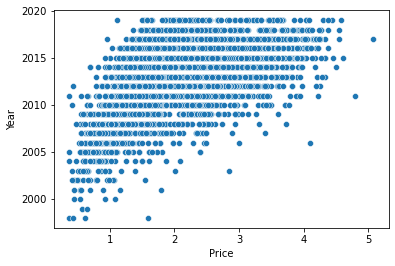

In [741]:
sns.scatterplot(processed_data["Price"], processed_data["Year"])

There is a decent correlation between price and year. The outliers look meaningful rather than like mistakes.

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')


<AxesSubplot:xlabel='Price', ylabel='Engine'>

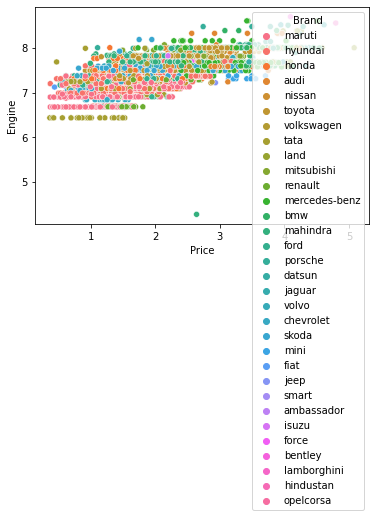

In [742]:
print(processed_data.columns)
brand_model = processed_data['Name'].str.lower().str.split(expand=True)
processed_data['Brand'] = brand_model[0]
processed_data['Model'] = brand_model[1]
sns.scatterplot(data=processed_data, x="Price", y="Engine", hue="Brand")

It looks like there is some signal in the brand name. We will use it.

<AxesSubplot:xlabel='Price', ylabel='Mileage'>

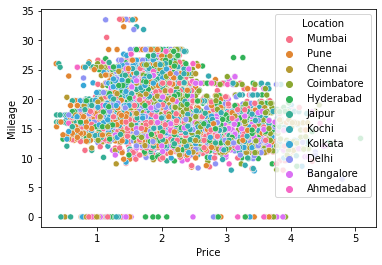

In [743]:
sns.scatterplot(data=processed_data, y="Mileage", x="Price", hue="Location")

<AxesSubplot:xlabel='Price', ylabel='Mileage'>

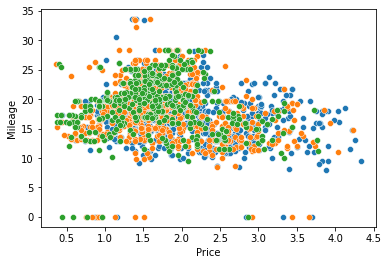

In [744]:
sns.scatterplot(data=processed_data[processed_data["Location"] == "Mumbai"], y="Mileage", x="Price")
sns.scatterplot(data=processed_data[processed_data["Location"] == "Pune"], y="Mileage", x="Price")
sns.scatterplot(data=processed_data[processed_data["Location"] == "Jaipur"], y="Mileage", x="Price")

Looks like there is also some signal in Location. We will add it as a one-hot-encoded vector.

<AxesSubplot:xlabel='Price', ylabel='Mileage'>

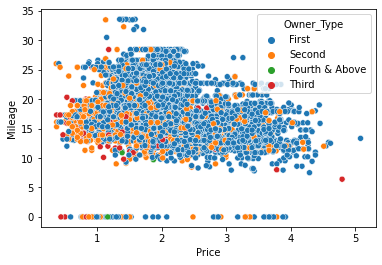

In [745]:
sns.scatterplot(data=processed_data, x="Price", y="Mileage", hue="Owner_Type")

In [746]:
processed_data.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'Brand', 'Model'],
      dtype='object')

In [747]:
# pairplot all the variables in case missed anything
# comment because it takes too long
# sns.pairplot(processed_data)

## Preprocessing

### To-Do's

- Drop Serial Number, name column
- check missing values, deal with them
- Change year column from float to int
- Check weird values on kilometers_driven and seats (0 as min) and engine (72 as min) and mileage (multiple 0's)
- deal with the one massive outlier on kilometers_driven
- Make New_Price, owner_type, power a numerical column
- Process transmission, engine
- one-hot-encode Fuel_type
- Check strange values for new_price, price (new_price close to 0)
- decide whether to drop engine or power
- examine the strange outliers between new_price and price
- drop seats
- check outliers

In [748]:
# if every serial number is unique, we can drop it. we already have index identifiers
print(len(processed_data['S.No.'].unique()) == len(processed_data['S.No.']))
processed_data = processed_data.drop(columns=["S.No."])

True


### Missing Data

In [749]:
def replaceWithCentralValue(data, selection, col, isSkewed):
    central = "50%" if isSkewed else "mean"
    data.loc[selection, col] = data.describe()[col][central]
    
def extrapolate(data, filt, dependent, independents):
    missing = filt
    if len(data[filt]) == 0:
        return
    missingJoined = ~missing
    for col in independents:
        missingJoined = missingJoined & ~data[col].isnull()
    reg = LinearRegression()
    missing_train = data[missingJoined]
    
    reg.fit(missing_train[independents], missing_train[dependent])
    predicted = reg.predict(data[filt][independents])
    data.loc[filt, dependent]= predicted

In [750]:
# look at missing values again
processed_data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price            6247
Price                1234
Brand                   0
Model                   0
dtype: int64

First, drop the rows where Price is null. We can't do anything with those, since the dependent variable is missing. Filling it with something will influence the model too much.

In [751]:
processed_data = processed_data[~processed_data['Price'].isnull()]

In [752]:
processed_data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                 143
Seats                  42
New_Price            5195
Price                   0
Brand                   0
Model                   0
dtype: int64

In [753]:
# look at mileage nulls
missing_mileage = processed_data[processed_data['Mileage'].isnull()]
missing_mileage

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,4.276666,3.713572,5.0,13.58,2.639057,mahindra,e
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,7.494430,4.290459,5.0,NaN,2.621039,toyota,prius


Since mileage depends strongly on engine and power, we can do a linear model of mileage dependent on engine and power and use that to extrapolate the missing information.

In [754]:
extrapolate(processed_data, processed_data["Mileage"].isnull(), "Mileage", ["Engine", "Power"])
# the engine value for this row seems wrong, so set to 0 so we can fix later.
processed_data.loc[processed_data.index == 4446,"Mileage"] = 0

In [755]:
# result
processed_data.iloc[missing_mileage.index]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,0.000000,4.276666,3.713572,5.0,13.58,2.639057,mahindra,e
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,16.860029,7.494430,4.290459,5.0,NaN,2.621039,toyota,prius


In [756]:
# check engine missing data
processed_data[processed_data['Engine'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,NaN,NaN,NaN,NaN,1.373716,honda,city
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,NaN,NaN,1.134623,maruti,swift
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.10,NaN,NaN,NaN,NaN,1.011601,maruti,swift
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,NaN,NaN,NaN,NaN,3.314186,land,rover
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.80,NaN,NaN,NaN,NaN,1.435085,honda,city
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.10,NaN,NaN,NaN,NaN,1.916923,maruti,swift
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.00,NaN,NaN,NaN,NaN,0.916291,honda,city
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.00,NaN,NaN,NaN,NaN,3.734808,land,rover
2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.10,NaN,NaN,NaN,NaN,1.423108,maruti,swift
2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,0.00,NaN,NaN,NaN,NaN,1.075002,hyundai,santro


All the rows that are missing engine are missing Power, Seats, and New_Price as well.

Because so much of New_Price is missing (80% of the rows) it is not safe to impute the value. Let's just drop it.

In [757]:
new_price = processed_data["New_Price"]
processed_data.drop(columns=["New_Price"], inplace=True)

Because the data that is missing for engine is missing many of the other columns as well, it is hard to do model-based imputation. Let's just do central-value imputation. Since engine is skewed right, we use median.

In [758]:
# comment out because maybe put in the replcaeWithCentralValue function
processed_data["Engine"] = processed_data.groupby(["Brand", "Model"])["Engine"].transform(lambda x: x.fillna(x.median()))
processed_data["Power"] = processed_data.groupby(["Brand", "Model"])["Power"].transform(lambda x: x.fillna(x.median()))
processed_data["Seats"] = processed_data.groupby(["Brand", "Model"])["Seats"].transform(lambda x: x.fillna(x.mean()))


In [759]:
replaceWithCentralValue(processed_data, processed_data['Engine'].isnull(), "Engine", True)
# processed_data.loc[processed_data['Engine'].isnull(), "Engine"] = processed_data.describe()["Engine"]["50%"]

In [760]:
# result
processed_data[processed_data['Engine'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model


In [761]:
# let's move on to missing power
processed_data[processed_data['Power'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,0.0,6.683361,NaN,2.0,1.386294,smart,fortwo
926,Porsche Cayman 2009-2012 S,Hyderabad,2010,10000,Petrol,Manual,First,9.0,8.142063,NaN,2.0,3.713572,porsche,cayman
1319,Fiat Petra 1.2 EL,Pune,2005,120000,Petrol,Manual,Second,15.5,7.124478,NaN,5.0,0.615186,fiat,petra
2053,Mahindra Jeep MM 550 PE,Hyderabad,2009,26000,Diesel,Manual,First,0.0,7.823246,NaN,6.0,2.078191,mahindra,jeep
2305,Porsche Cayman 2009-2012 S tiptronic,Mumbai,2011,8000,Petrol,Automatic,First,9.0,8.142063,NaN,2.0,3.784190,porsche,cayman
2369,Maruti Estilo LXI,Chennai,2008,56000,Petrol,Manual,Second,19.5,6.966967,NaN,NaN,0.916291,maruti,estilo
3882,Maruti Estilo LXI,Kolkata,2010,40000,Petrol,Manual,Second,19.5,6.966967,NaN,NaN,1.252763,maruti,estilo
4629,Fiat Siena 1.2 ELX,Jaipur,2001,70000,Petrol,Manual,Third,0.0,7.124478,NaN,5.0,0.438255,fiat,siena
4709,Maruti 1000 AC,Hyderabad,1998,104000,Petrol,Manual,Second,15.0,6.877296,NaN,5.0,0.615186,maruti,1000
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.5,6.966967,NaN,NaN,1.011601,maruti,estilo


In [762]:
# do the same thing, impute with median, since power is also skewed right
replaceWithCentralValue(processed_data, processed_data['Power'].isnull(), "Power", True)

In [763]:
# result
processed_data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                3
Price                0
Brand                0
Model                0
dtype: int64

In [764]:
# last one is seats
# since seats is a symmetric distribution, we can use the mean for imputation
processed_data.loc[processed_data['Seats'].isnull(), "Seats"] = processed_data.describe()["Seats"]["mean"]

In [765]:
processed_data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Brand                0
Model                0
dtype: int64

Done with missing values!

### Dealing with Strange Values (Outliers)

There were a few strange outliers in our exploratory data analysis that we need to deal with. Particularly:
- the kilometers_driven with over 1e6 kilometers
- the engine with only 76 as a value
- multiple values for Mileage where the value is 0
- seats with value of 0
- example where new_price was very low and used price was comparatively much higher

Let's look at these.

In [766]:
kilometers_outlier = processed_data[processed_data["Kilometers_Driven"] > 1e6]
kilometers_outlier

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,8.004032,5.55296,5.0,4.189655,bmw,x5


In [767]:
# I want to see where this example lies in the example space
temp_data = processed_data.copy()
temp_data["is_kilo_outlier"] = temp_data["Kilometers_Driven"] > 1e6
# sns.pairplot(temp_data, hue="is_kilo_outlier")
del temp_data

In [768]:
# it looks like it lies in the middle of the dataset, so a central-value imputation is reasonable.
# we use median because right-skew
replaceWithCentralValue(processed_data, processed_data["Kilometers_Driven"] > 1e6, "Kilometers_Driven", True)

In [769]:
# look at the engine outlier
processed_data[processed_data["Engine"] <600]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000.0,CNG,Manual,First,26.60,6.905753,4.063198,5.0,1.011601,maruti,wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000.0,Diesel,Manual,First,19.67,7.366445,4.837868,5.0,2.602690,hyundai,creta
2,Honda Jazz V,Chennai,2011,46000.0,Petrol,Manual,First,18.20,7.089243,4.485260,5.0,1.704748,honda,jazz
3,Maruti Ertiga VDI,Chennai,2012,87000.0,Diesel,Manual,First,20.77,7.129298,4.485936,7.0,1.945910,maruti,ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670.0,Diesel,Automatic,Second,15.20,7.584773,4.947340,5.0,2.930660,audi,a4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365.0,Diesel,Manual,First,28.40,7.129298,4.304065,5.0,1.749200,maruti,swift
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000.0,Diesel,Manual,First,24.40,7.021084,4.262680,5.0,1.609438,hyundai,xcent
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000.0,Diesel,Manual,Second,14.00,7.823246,4.718499,8.0,1.360977,mahindra,xylo
6017,Maruti Wagon R VXI,Kolkata,2013,46000.0,Petrol,Manual,First,18.90,6.905753,4.206184,5.0,1.294727,maruti,wagon


In [770]:
replaceWithCentralValue(processed_data, processed_data["Engine"] <600, "Engine", True)

In [771]:
# look at the mileage values
weird_mileage = processed_data[processed_data["Mileage"] == 0]
weird_mileage

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000.0,Diesel,Automatic,Second,0.0,7.308543,4.744932,5.0,2.917771,land,rover
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369.0,Diesel,Automatic,First,0.0,7.308543,5.267858,5.0,3.601959,mercedes-benz,c-class
79,Hyundai Santro Xing XL,Hyderabad,2005,87591.0,Petrol,Manual,First,0.0,7.308543,4.128746,5.0,0.832909,hyundai,santro
194,Honda City 1.5 GXI,Ahmedabad,2007,60006.0,Petrol,Manual,First,0.0,7.308543,4.764735,5.0,1.373716,honda,city
229,Ford Figo Diesel,Bangalore,2015,70436.0,Diesel,Manual,First,0.0,7.308543,4.595120,5.0,1.526056,ford,figo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5647,Toyota Qualis Fleet A3,Mumbai,2001,227000.0,Diesel,Manual,Fourth & Above,0.0,7.308543,4.317488,8.0,1.163151,toyota,qualis
5875,Mercedes-Benz C-Class Progressive C 220d,Ahmedabad,2019,4000.0,Diesel,Automatic,First,0.0,7.308543,5.267858,5.0,3.583519,mercedes-benz,c-class
5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000.0,Diesel,Manual,First,0.0,7.308543,4.540098,6.0,0.993252,mahindra,jeep
5972,Hyundai Santro Xing GL,Mumbai,2008,65000.0,Petrol,Manual,Second,0.0,7.308543,4.127134,5.0,0.871293,hyundai,santro


In [772]:
# extraploate mileage values from engine and power
extrapolate(processed_data, processed_data["Mileage"] == 0, "Mileage", ["Engine", "Power"])

In [773]:
# result
processed_data.iloc[weird_mileage.index]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000.0,Diesel,Automatic,Second,17.701897,7.308543,4.744932,5.0,2.917771,land,rover
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369.0,Diesel,Automatic,First,14.721363,7.308543,5.267858,5.0,3.601959,mercedes-benz,c-class
79,Hyundai Santro Xing XL,Hyderabad,2005,87591.0,Petrol,Manual,First,21.213988,7.308543,4.128746,5.0,0.832909,hyundai,santro
194,Honda City 1.5 GXI,Ahmedabad,2007,60006.0,Petrol,Manual,First,17.589028,7.308543,4.764735,5.0,1.373716,honda,city
229,Ford Figo Diesel,Bangalore,2015,70436.0,Diesel,Manual,First,18.555786,7.308543,4.595120,5.0,1.526056,ford,figo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5647,Toyota Qualis Fleet A3,Mumbai,2001,227000.0,Diesel,Manual,Fourth & Above,20.138210,7.308543,4.317488,8.0,1.163151,toyota,qualis
5875,Mercedes-Benz C-Class Progressive C 220d,Ahmedabad,2019,4000.0,Diesel,Automatic,First,14.721363,7.308543,5.267858,5.0,3.583519,mercedes-benz,c-class
5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000.0,Diesel,Manual,First,18.869394,7.308543,4.540098,6.0,0.993252,mahindra,jeep
5972,Hyundai Santro Xing GL,Mumbai,2008,65000.0,Petrol,Manual,Second,21.223174,7.308543,4.127134,5.0,0.871293,hyundai,santro


In [774]:
# replace 0 seats with mean
replaceWithCentralValue(processed_data, selection=processed_data["Seats"]==0, col="Seats", isSkewed=False)

In [775]:
#result
processed_data[processed_data["Seats"]==0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model


In [776]:
# check the disproportionate new_price and used price examples
# use a ratio
# have to use data, because already dropped new_price from processed_data
temp_var = processed_data.copy()
temp_var["ratio"] = processed_data["Price"] / new_price
temp_var[temp_var["Price"] / new_price > 10]

del temp_var

That set of outliers doesn't make sense. It's a good thing that I dropped the New_Price column.

In [777]:
# comment out to make faster
# sns.pairplot(processed_data)

The pairplot looks much better now that the outliers are out of the way.

#### Feature Engineering


In [778]:
# get dummies for the categorical variables
processed_data = pd.get_dummies(processed_data, columns=["Transmission", "Fuel_Type", "Brand", "Location", "Model"], drop_first=True)

In [779]:
# change owner_type column to a numerical column since the order has information
def convertOwnerType(x):
    if x == "First":
        return 1
    elif x== "Second":
        return 2
    elif x=="Third":
        return 3
    else:
        return 4
        
# keeping it as a categorical variable turned out to make a better model, so this is commented out
processed_data["Owner_Type"] = processed_data["Owner_Type"].apply(convertOwnerType)

## Model Creation

In [780]:
processed_data.columns

Index(['Name', 'Year', 'Kilometers_Driven', 'Owner_Type', 'Mileage', 'Engine',
       'Power', 'Seats', 'Price', 'Transmission_Manual',
       ...
       'Model_xenon', 'Model_xf', 'Model_xj', 'Model_xuv300', 'Model_xuv500',
       'Model_xylo', 'Model_yeti', 'Model_z4', 'Model_zen', 'Model_zest'],
      dtype='object', length=263)

In [781]:
X_data = processed_data.drop(columns=["Name", "Price"])
y_data = processed_data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=17)


In [782]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [783]:
# the numerical features in the problem description
# the categorical features are one-hot-encoded and don't have a singlular coeff
for i, col in enumerate(X_train):
    print("coeff of ", col, " is ", reg.coef_[i])
    
print("\n\nintercept: ", reg.intercept_)

coeff of  Year  is  0.08958873300926279
coeff of  Kilometers_Driven  is  -9.892879627992672e-07
coeff of  Owner_Type  is  -0.04431286148394442
coeff of  Mileage  is  0.0005755956421599762
coeff of  Engine  is  5.5660892561704145e-12
coeff of  Power  is  0.3009773532186598
coeff of  Seats  is  0.021876123046463136
coeff of  Transmission_Manual  is  -0.09087264835589909
coeff of  Fuel_Type_Diesel  is  0.038094275062323865
coeff of  Fuel_Type_Electric  is  8.680278718031786e-13
coeff of  Fuel_Type_LPG  is  -0.0418709763287698
coeff of  Fuel_Type_Petrol  is  -0.03678274681522492
coeff of  Brand_audi  is  0.536655910955385
coeff of  Brand_bentley  is  2.895184092466252e-12
coeff of  Brand_bmw  is  0.12082955909010164
coeff of  Brand_chevrolet  is  -0.6529832037315998
coeff of  Brand_datsun  is  -0.8461948651455176
coeff of  Brand_fiat  is  -0.6532355048950288
coeff of  Brand_force  is  -0.0996959173726627
coeff of  Brand_ford  is  -0.6895762342504893
coeff of  Brand_honda  is  -0.4676483956

coeff of  Model_tucson  is  0.7413719163431763
coeff of  Model_tuv  is  -0.0915211656090559
coeff of  Model_v40  is  0.08738481113345624
coeff of  Model_vento  is  -0.2569354771694242
coeff of  Model_venture  is  -0.3918759498976682
coeff of  Model_verito  is  -0.22661277506072983
coeff of  Model_verna  is  0.36709700219308455
coeff of  Model_versa  is  0.0
coeff of  Model_vitara  is  0.07975683627570124
coeff of  Model_wagon  is  -0.24918522615276886
coeff of  Model_wr-v  is  0.0
coeff of  Model_wrv  is  0.07802706511559282
coeff of  Model_x-trail  is  0.2745053204029192
coeff of  Model_x1  is  0.11294244654744788
coeff of  Model_x3  is  0.39003696119255576
coeff of  Model_x5  is  0.664269412922107
coeff of  Model_x6  is  0.8816162629721207
coeff of  Model_xc60  is  0.100482178479825
coeff of  Model_xc90  is  0.2949281473814953
coeff of  Model_xcent  is  0.14523104305130435
coeff of  Model_xe  is  -0.15751524361796732
coeff of  Model_xenon  is  -0.3213624291868625
coeff of  Model_xf  

### Evaluation

In [784]:
reg.score(X_train, y_train)

0.9618996860259957

In [786]:
reg.score(X_test, y_test)

0.9373133894709931

In [787]:
predictions = reg.predict(X_train)
print(np.sqrt(mean_squared_error(predictions, y_train)))

0.14430307584186844


In [788]:
predictions = reg.predict(X_test)

In [789]:
error = np.sqrt(mean_squared_error(predictions, y_test))
error

0.19232926654728594

In [790]:
error / (data.describe().Price['std'])

0.017190801881537553

This error isn't so bad! Standard error is less than a standard deviation.

In [791]:
mean_absolute_error(predictions, y_test)

0.11998441422574564

In [792]:
mean_absolute_percentage_error(predictions, y_test)

0.10325930741863272

# Conclusions and Takeaways

The conclusion here is that the price of a used car can indeed be extrapolated to a reasonable degree of accuracy from the features location, brand name, engine & power specs, mileage, model year, kilometers driven, owner type, and number of seats.

Certain brand names tend to predict higher prices. These are Porsche, Mercedes Benz, Land Rover, and Jaguar. Noticeably, these are luxury cars. This may be the reason for higher prices, even when used.

Certain cities tend to predict higher prices. These include Bangalore, Chennai, and Hyberabad. The reason for this is unclear, perhaps the people there are more impatient, or there is a greater demand for cars there. In any case, Cars4U may be able to gain a greater profit margin by selling in those cities.